In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("/content/bank.csv", sep=";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [2]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [3]:
def replace_marital(val):
  if val=="single":
    return 0
  else:
    return 1
df["marital"]=df["marital"].apply(replace_marital,1)
df.head()

<ipython-input-3-e3f3028052ce>:6: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  df["marital"]=df["marital"].apply(replace_marital,1)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,1,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,1,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,0,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,1,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,1,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
df["housing"]=df["housing"].map({
 "no":0,
 "yes":1
}.get)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,1,primary,no,1787,0,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,1,secondary,no,4789,1,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,0,tertiary,no,1350,1,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,1,tertiary,no,1476,1,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,1,secondary,no,0,1,no,unknown,5,may,226,1,-1,0,unknown,no


In [5]:
df["loan"]=df["loan"].replace({
 "no":0,
 "yes":1
})
df.head()

<ipython-input-5-d4641d45ef28>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["loan"]=df["loan"].replace({


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,1,primary,no,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,1,secondary,no,4789,1,1,cellular,11,may,220,1,339,4,failure,no
2,35,management,0,tertiary,no,1350,1,0,cellular,16,apr,185,1,330,1,failure,no
3,30,management,1,tertiary,no,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,1,secondary,no,0,1,0,unknown,5,may,226,1,-1,0,unknown,no


In [6]:
df["job"].unique() #to find unique value of column job

array(['unemployed', 'services', 'management', 'blue-collar',
       'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
       'housemaid', 'retired', 'unknown'], dtype=object)

**inplace** instead of creating new dataframe it copies in the old data frame

In [7]:
df["job"].replace({
 'unknown':np.nan,
 'unemployed':0, 'services':1, 'management':2, 'blue-collar':3,
 'self-employed':4, 'technician':5, 'entrepreneur':6,
'admin.':7, 'student':8,
 'housemaid':9, 'retired':10
},inplace=True)
df.head()


<ipython-input-7-b2109e05a277>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["job"].replace({
<ipython-input-7-b2109e05a277>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["job"].replace({


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,0.0,1,primary,no,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,no
1,33,1.0,1,secondary,no,4789,1,1,cellular,11,may,220,1,339,4,failure,no
2,35,2.0,0,tertiary,no,1350,1,0,cellular,16,apr,185,1,330,1,failure,no
3,30,2.0,1,tertiary,no,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,no
4,59,3.0,1,secondary,no,0,1,0,unknown,5,may,226,1,-1,0,unknown,no


In [8]:
df["education"].unique()


array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object)

In [9]:
df["education"].replace({
 'primary':0, 'secondary':1, 'tertiary':2, 'unknown':np.nan
} ,inplace=True)
df.head()

<ipython-input-9-645a1db32540>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["education"].replace({
<ipython-input-9-645a1db32540>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["education"].replace({


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,0.0,1,0.0,no,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,no
1,33,1.0,1,1.0,no,4789,1,1,cellular,11,may,220,1,339,4,failure,no
2,35,2.0,0,2.0,no,1350,1,0,cellular,16,apr,185,1,330,1,failure,no
3,30,2.0,1,2.0,no,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,no
4,59,3.0,1,1.0,no,0,1,0,unknown,5,may,226,1,-1,0,unknown,no


In [10]:
df["default"].replace({
 "no":0,
 "yes":1
},inplace=True)
df.head()

<ipython-input-10-83ce5d7dfc10>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["default"].replace({
<ipython-input-10-83ce5d7dfc10>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["default"].replace({


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,0.0,1,0.0,0,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,no
1,33,1.0,1,1.0,0,4789,1,1,cellular,11,may,220,1,339,4,failure,no
2,35,2.0,0,2.0,0,1350,1,0,cellular,16,apr,185,1,330,1,failure,no
3,30,2.0,1,2.0,0,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,no
4,59,3.0,1,1.0,0,0,1,0,unknown,5,may,226,1,-1,0,unknown,no


In [12]:
df["balance"].min()


-3313

In [13]:
df["balance"].max()

71188

Apply min-max normalization to attribute balance

In [14]:
df["balance"]=df["balance"].apply(lambda v: (v -
df["balance"].min()))/(df["balance"].max()-df["balance"].min())
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,0.0,1,0.0,0,0.068455,0,0,cellular,19,oct,79,1,-1,0,unknown,no
1,33,1.0,1,1.0,0,0.108750,1,1,cellular,11,may,220,1,339,4,failure,no
2,35,2.0,0,2.0,0,0.062590,1,0,cellular,16,apr,185,1,330,1,failure,no
3,30,2.0,1,2.0,0,0.064281,1,1,unknown,3,jun,199,4,-1,0,unknown,no
4,59,3.0,1,1.0,0,0.044469,1,0,unknown,5,may,226,1,-1,0,unknown,no


In [15]:
df.contact.replace({"unknown":np.nan, "telephone":0, "cellular":1},
inplace=True)
df.head()

<ipython-input-15-b74c0a009967>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.contact.replace({"unknown":np.nan, "telephone":0, "cellular":1},
<ipython-input-15-b74c0a009967>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.contact.replace({"unknown":np.nan, "telephone":0, "cellular":1},


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,0.0,1,0.0,0,0.068455,0,0,1.0,19,oct,79,1,-1,0,unknown,no
1,33,1.0,1,1.0,0,0.108750,1,1,1.0,11,may,220,1,339,4,failure,no
2,35,2.0,0,2.0,0,0.062590,1,0,1.0,16,apr,185,1,330,1,failure,no
3,30,2.0,1,2.0,0,0.064281,1,1,NaN,3,jun,199,4,-1,0,unknown,no
4,59,3.0,1,1.0,0,0.044469,1,0,NaN,5,may,226,1,-1,0,unknown,no


In [16]:
df.contact.unique()

array([ 1., nan,  0.])

In [17]:
df.month.unique()

array(['oct', 'may', 'apr', 'jun', 'feb', 'aug', 'jan', 'jul', 'nov',
       'sep', 'mar', 'dec'], dtype=object)

In [18]:
df.month=df.month.map({'oct':10, 'may':5, 'apr':4, 'jun':6, 'feb':2,
'aug':8, 'jan':1, 'jul':7, 'nov':11,
 'sep':9, 'mar':3, 'dec':12})
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,0.0,1,0.0,0,0.068455,0,0,1.0,19,10,79,1,-1,0,unknown,no
1,33,1.0,1,1.0,0,0.108750,1,1,1.0,11,5,220,1,339,4,failure,no
2,35,2.0,0,2.0,0,0.062590,1,0,1.0,16,4,185,1,330,1,failure,no
3,30,2.0,1,2.0,0,0.064281,1,1,NaN,3,6,199,4,-1,0,unknown,no
4,59,3.0,1,1.0,0,0.044469,1,0,NaN,5,5,226,1,-1,0,unknown,no


In [19]:
df.poutcome.unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [20]:
df.poutcome=df.poutcome.map({'unknown':np.nan, 'failure':0, 'other':1,
'success':2})
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,0.0,1,0.0,0,0.068455,0,0,1.0,19,10,79,1,-1,0,NaN,no
1,33,1.0,1,1.0,0,0.108750,1,1,1.0,11,5,220,1,339,4,0.0,no
2,35,2.0,0,2.0,0,0.062590,1,0,1.0,16,4,185,1,330,1,0.0,no
3,30,2.0,1,2.0,0,0.064281,1,1,NaN,3,6,199,4,-1,0,NaN,no
4,59,3.0,1,1.0,0,0.044469,1,0,NaN,5,5,226,1,-1,0,NaN,no


In [21]:
df.pdays=df.pdays.apply(lambda v:(v-df.pdays.min())/(df.pdays.max()-
df.pdays.min()))
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,0.0,1,0.0,0,0.068455,0,0,1.0,19,10,79,1,0.000000,0,NaN,no
1,33,1.0,1,1.0,0,0.108750,1,1,1.0,11,5,220,1,0.389908,4,0.0,no
2,35,2.0,0,2.0,0,0.062590,1,0,1.0,16,4,185,1,0.379587,1,0.0,no
3,30,2.0,1,2.0,0,0.064281,1,1,NaN,3,6,199,4,0.000000,0,NaN,no
4,59,3.0,1,1.0,0,0.044469,1,0,NaN,5,5,226,1,0.000000,0,NaN,no


In [22]:
df.y.unique()

array(['no', 'yes'], dtype=object)

In [23]:
df.y.replace({'no':0, 'yes':1}, inplace=True)
df.head()

<ipython-input-23-ce21d4741977>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.y.replace({'no':0, 'yes':1}, inplace=True)
<ipython-input-23-ce21d4741977>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.y.replace({'no':0, 'yes':1}, inplace=True)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,0.0,1,0.0,0,0.068455,0,0,1.0,19,10,79,1,0.000000,0,NaN,0
1,33,1.0,1,1.0,0,0.108750,1,1,1.0,11,5,220,1,0.389908,4,0.0,0
2,35,2.0,0,2.0,0,0.062590,1,0,1.0,16,4,185,1,0.379587,1,0.0,0
3,30,2.0,1,2.0,0,0.064281,1,1,NaN,3,6,199,4,0.000000,0,NaN,0
4,59,3.0,1,1.0,0,0.044469,1,0,NaN,5,5,226,1,0.000000,0,NaN,0


In [24]:
df.duration=df.duration.apply(lambda v:(v-df.duration.min())/(df.duration.max()-df.duration.min()))
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,0.0,1,0.0,0,0.068455,0,0,1.0,19,10,0.024826,1,0.000000,0,NaN,0
1,33,1.0,1,1.0,0,0.108750,1,1,1.0,11,5,0.071500,1,0.389908,4,0.0,0
2,35,2.0,0,2.0,0,0.062590,1,0,1.0,16,4,0.059914,1,0.379587,1,0.0,0
3,30,2.0,1,2.0,0,0.064281,1,1,NaN,3,6,0.064548,4,0.000000,0,NaN,0
4,59,3.0,1,1.0,0,0.044469,1,0,NaN,5,5,0.073486,1,0.000000,0,NaN,0


In [25]:
df.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,4521.000000,4483.000000,4521.000000,4334.000000,4521.000000,4521.000000,4521.000000,4521.000000,3197.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,816.000000,4521.000000
mean,41.170095,4.037252,0.735457,1.155053,0.016810,0.063565,0.566025,0.152842,0.905849,15.915284,6.166777,0.086051,2.793630,0.046751,0.542579,0.557598,0.115240
std,10.576211,2.534139,0.441138,0.666325,0.128575,0.040397,0.495676,0.359875,0.292084,8.247667,2.378380,0.086017,3.109807,0.114818,1.693562,0.750699,0.319347
min,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,2.000000,0.000000,1.000000,0.000000,0.045395,0.000000,0.000000,1.000000,9.000000,5.000000,0.033102,1.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,3.000000,1.000000,1.000000,0.000000,0.050429,1.000000,0.000000,1.000000,16.000000,6.000000,0.059914,2.000000,0.000000,0.000000,0.000000,0.000000
75%,49.000000,5.000000,1.000000,2.000000,0.000000,0.064335,1.000000,0.000000,1.000000,21.000000,8.000000,0.107580,3.000000,0.000000,0.000000,1.000000,0.000000
max,87.000000,10.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,31.000000,12.000000,1.000000,50.000000,1.000000,25.000000,2.000000,1.000000


In [29]:
df.shape

(4521, 17)

In [30]:
df.to_csv("/content/bank_preprocessed.csv",index=False)
new_df=pd.read_csv("/content/bank_preprocessed.csv")
new_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,0.0,1,0.0,0,0.068455,0,0,1.0,19,10,0.024826,1,0.000000,0,NaN,0
1,33,1.0,1,1.0,0,0.108750,1,1,1.0,11,5,0.071500,1,0.389908,4,0.0,0
2,35,2.0,0,2.0,0,0.062590,1,0,1.0,16,4,0.059914,1,0.379587,1,0.0,0
3,30,2.0,1,2.0,0,0.064281,1,1,NaN,3,6,0.064548,4,0.000000,0,NaN,0
4,59,3.0,1,1.0,0,0.044469,1,0,NaN,5,5,0.073486,1,0.000000,0,NaN,0


In [31]:
new_df.corr()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
age,1.000000,0.246948,0.410768,-0.190484,-0.017885,0.083820,-0.193888,-0.011250,-0.204200,-0.017853,0.073764,-0.002367,-0.005148,-0.008894,-0.003511,0.048548,0.045092
job,0.246948,1.000000,0.022194,-0.159257,0.000797,0.046488,-0.140553,0.009586,-0.084848,0.000524,0.026193,-0.009160,-0.041718,0.001408,0.022125,0.073736,0.066550
marital,0.410768,0.022194,1.000000,-0.169967,-0.007391,-0.007525,0.041449,0.048496,-0.056938,-0.006769,0.061882,-0.024560,0.008093,-0.020693,-0.035558,-0.009813,-0.045815
education,-0.190484,-0.159257,-0.169967,1.000000,-0.011623,0.056585,-0.072716,-0.024752,0.117748,0.017107,0.083234,-0.011193,0.009714,0.011531,0.030396,0.023715,0.055368
default,-0.017885,0.000797,-0.007391,-0.011623,1.000000,-0.070886,0.006881,0.063994,0.023372,-0.013261,0.008917,-0.011615,-0.012348,-0.026317,-0.026656,0.025369,0.001303
balance,0.083820,0.046488,-0.007525,0.056585,-0.070886,1.000000,-0.050227,-0.071349,-0.036326,-0.008677,0.099872,-0.015950,-0.009976,0.009437,0.026196,0.020393,0.017905
housing,-0.193888,-0.140553,0.041449,-0.072716,0.006881,-0.050227,1.000000,0.018451,0.046484,-0.031291,-0.170922,0.015740,-0.003574,0.116893,0.038621,-0.253137,-0.104683
loan,-0.011250,0.009586,0.048496,-0.024752,0.063994,-0.071349,0.018451,1.000000,0.007166,-0.004879,0.039226,-0.004997,0.017120,-0.031086,-0.022115,-0.096067,-0.070517
contact,-0.204200,-0.084848,-0.056938,0.117748,0.023372,-0.036326,0.046484,0.007166,1.000000,-0.055509,0.014321,0.027292,-0.033973,0.024204,0.001642,-0.037807,-0.002108
day,-0.017853,0.000524,-0.006769,0.017107,-0.013261,-0.008677,-0.031291,-0.004879,-0.055509,1.000000,0.080436,-0.024629,0.160706,-0.094352,-0.059114,0.019975,-0.011244


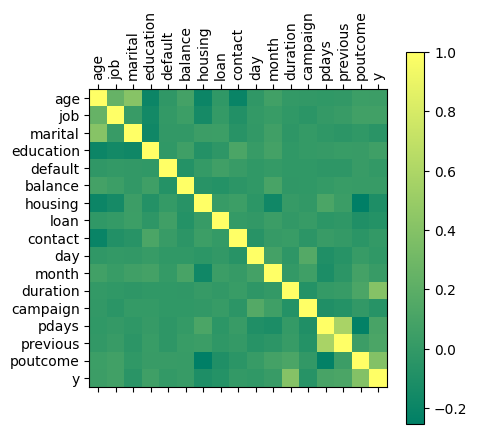

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.matshow(new_df.corr(), cmap='summer')
plt.colorbar()
plt.xticks(list(range(len(new_df.columns))), new_df.columns,
rotation='vertical')
plt.yticks(list(range(len(new_df.columns))), new_df.columns,
rotation='horizontal')
plt.show()


In [33]:
new_df.corr()["y"].sort_values(ascending=False)

,y
y,1.000000
duration,0.401118
poutcome,0.396350
previous,0.116714
pdays,0.104087
job,0.066550
education,0.055368
age,0.045092
month,0.023335
balance,0.017905


([<matplotlib.axis.XTick at 0x7cca18dea2c0>,
 [Text(0, 0, 'age'),
  Text(1, 0, 'job'),
  Text(2, 0, 'marital'),
  Text(3, 0, 'education'),
  Text(4, 0, 'default'),
  Text(5, 0, 'balance'),
  Text(6, 0, 'housing'),
  Text(7, 0, 'loan'),
  Text(8, 0, 'contact'),
  Text(9, 0, 'day'),
  Text(10, 0, 'month'),
  Text(11, 0, 'duration'),
  Text(12, 0, 'campaign'),
  Text(13, 0, 'pdays'),
  Text(14, 0, 'previous'),
  Text(15, 0, 'poutcome'),
  Text(16, 0, 'y')])

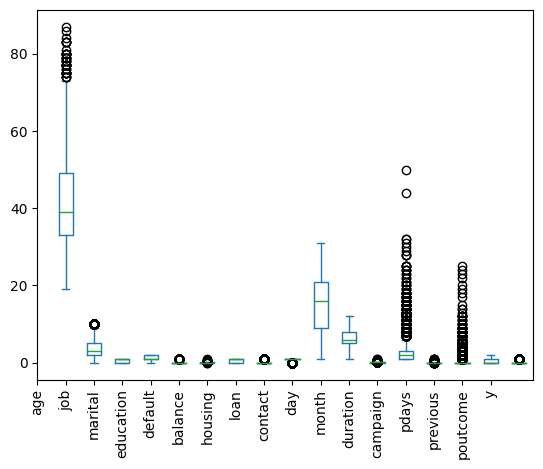

In [34]:
new_df.plot.box()
plt.xticks(list(range(len(new_df.columns))), new_df.columns,
rotation='vertical')

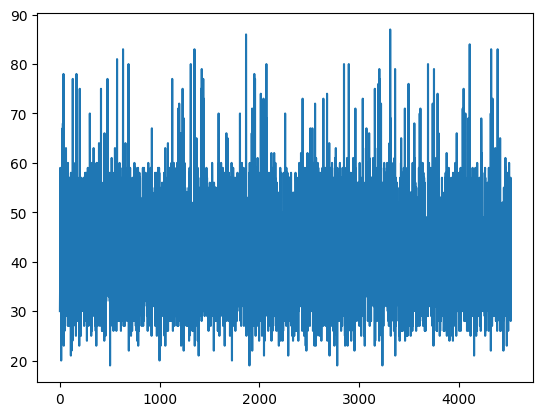

In [35]:
plt.plot(df.age.values) #line plot

(array([ 111.,  944., 1235.,  869.,  612.,  576.,  100.,   36.,   30.,
           8.]),
 array([19. , 25.8, 32.6, 39.4, 46.2, 53. , 59.8, 66.6, 73.4, 80.2, 87. ]),
 <BarContainer object of 10 artists>)

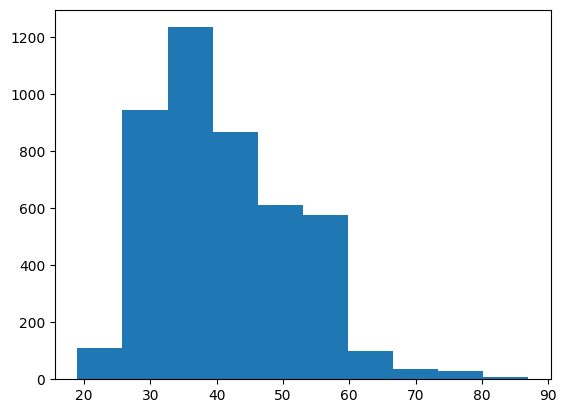

In [36]:
plt.hist(df.age.values) #histogram